/home/hengl/quick_cv_example/.pixi/envs/default/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_3923581/2688864084.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend 

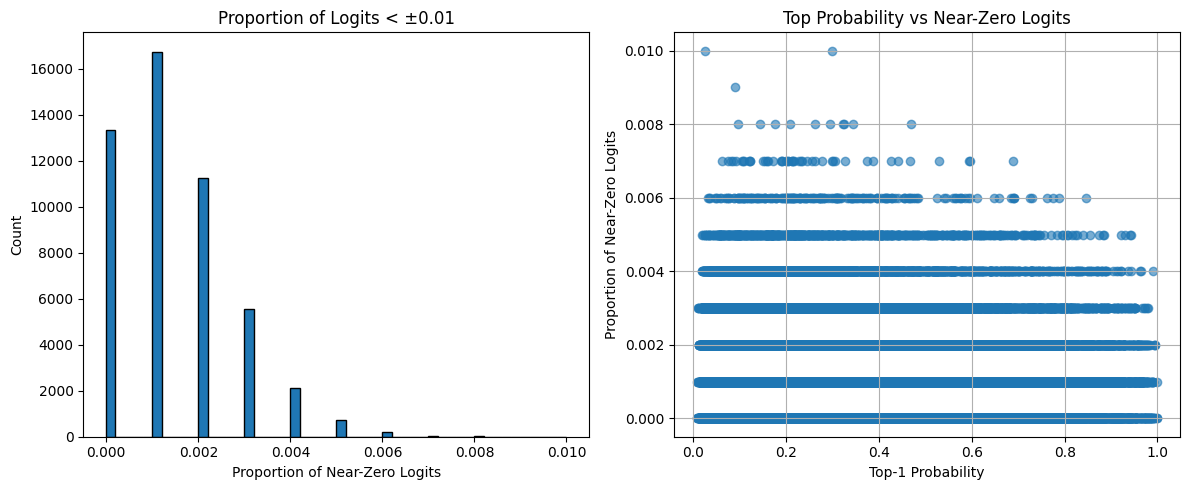

In [2]:
# magic 
%load_ext autoreload
%autoreload 2

from viz import analyze_logits, plot_logit_analysis
import torch 
from pathlib import Path
# load logits and labels
file = torch.load('maxsup_logits.pt')
maxsup_logits = file['logits']
maxsup_labels = file['labels']

proportions, top_probs = analyze_logits(maxsup_logits, threshold=0.001)

plot_logit_analysis(proportions, top_probs, save_dir=None)


/tmp/ipykernel_3923581/1019425296.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  file = torch.load('penalty_logits.pt')


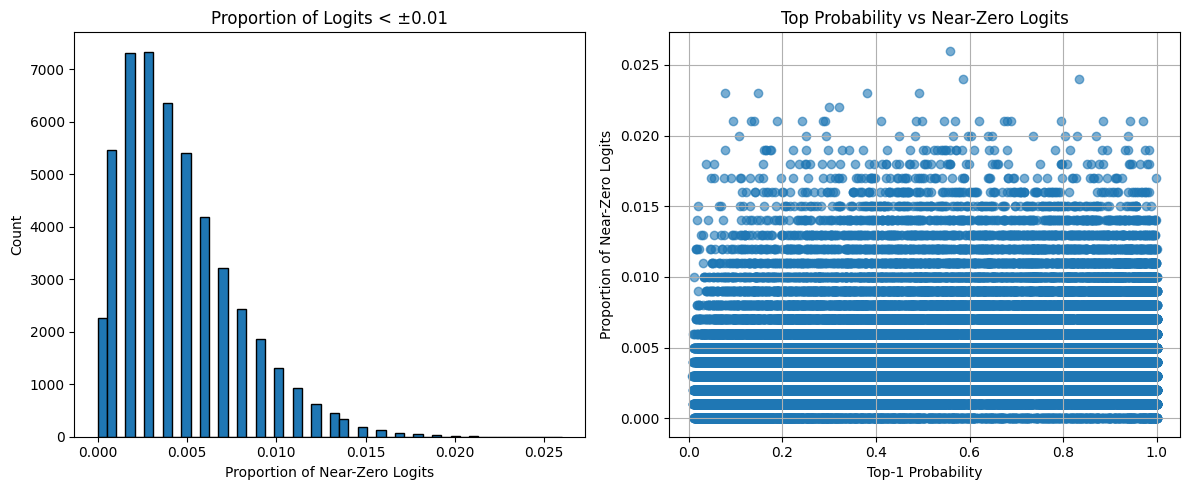

In [3]:
file = torch.load('penalty_logits.pt')
penalty_logits = file['logits']
penalty_labels = file['labels']

proportions, top_probs = analyze_logits(penalty_logits, threshold=0.001)

plot_logit_analysis(proportions, top_probs, save_dir=None)

/tmp/ipykernel_3923581/3129242390.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  file = torch.load('ce_logits.pt')


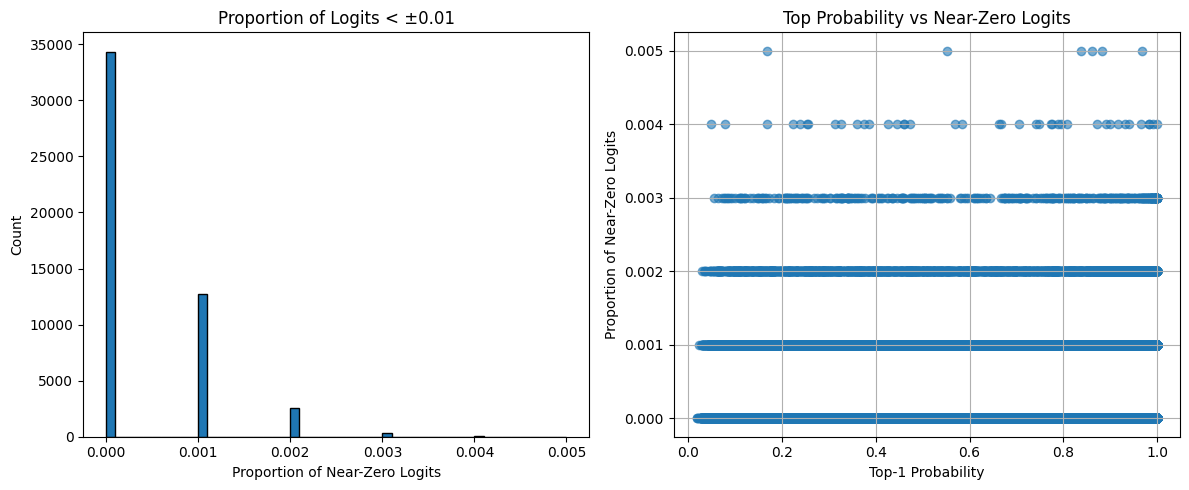

In [4]:
file = torch.load('ce_logits.pt')
ce_logits = file['logits']
ce_labels = file['labels']

proportions, top_probs = analyze_logits(ce_logits, threshold=0.001)

plot_logit_analysis(proportions, top_probs, save_dir=None)

/tmp/ipykernel_3923581/2950768839.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  file = torch.load('ls_logits.pt')


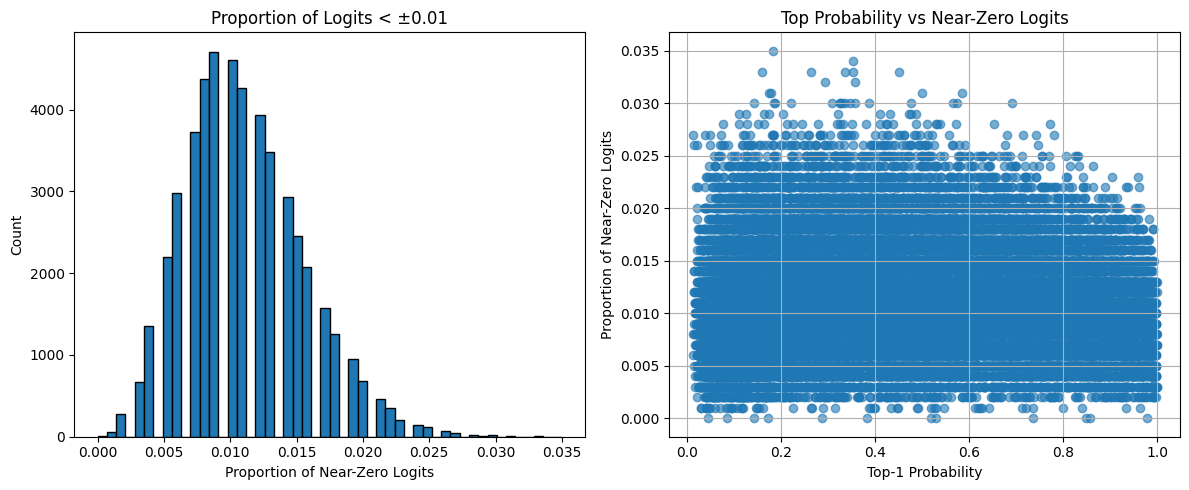

In [5]:
file = torch.load('ls_logits.pt')
ls_logits = file['logits']
ls_labels = file['labels']

proportions, top_probs = analyze_logits(ls_logits, threshold=0.01)

plot_logit_analysis(proportions, top_probs, save_dir=None)

/tmp/ipykernel_3923581/1553514176.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  file = torch.load('ols_logits.pt')


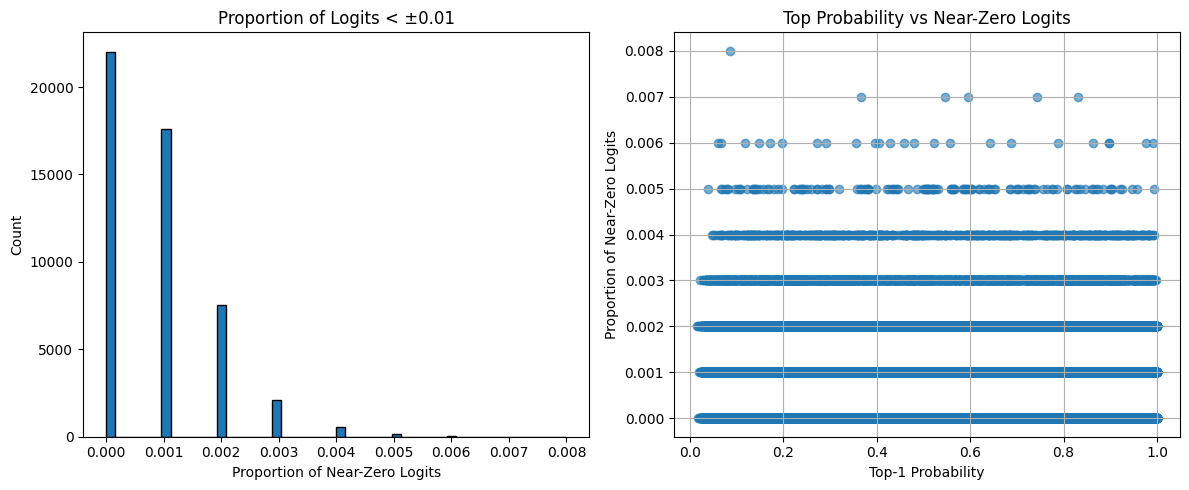

In [6]:
file = torch.load('ols_logits.pt')
ols_logits = file['logits']
ols_labels = file['labels']

proportions, top_probs = analyze_logits(ols_logits, threshold=0.001)

plot_logit_analysis(proportions, top_probs, save_dir=None)

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt
import os
def plot_density_seaborn(logit_list, save_dir=None, save_to_pdf=False):
    plt.figure(figsize=(10, 6))
    for i in range(len(logit_list)):
        sns.kdeplot(data=logit_list[i], fill=True, log_scale=False)
    plt.xlabel('Logits', fontsize=12)
    # limit x to -10, 10
    plt.xlim(-4, 4)
    plt.ylabel('Density', fontsize=12)
    plt.title('Density Plot of Logits', fontsize=14)
    if len(logit_list) > 4:
        plt.legend(['MaxSup', 'Penalty', 'CE', 'LS', 'OLS'], fontsize=12)
    else:
        plt.legend(['MaxSup', 'Penalty', 'CE', 'LS'], fontsize=12)
    plt.show()
    if save_dir is not None:
        if save_to_pdf:
            plt.savefig(os.path.join(save_dir, 'density_plot.pdf'))
        else:
            plt.savefig(os.path.join(save_dir, 'density_plot.png'))
    plt.close()

def plot_density_seaborn_better(logit_list, save_dir=None, save_to_pdf=False):
    """
    Plot density distribution of logits with improved visualization.
    
    Args:
        logit_list (List[np.ndarray]): List of logit arrays to plot
        save_dir (str, optional): Directory to save the plot
        save_to_pdf (bool): Whether to save as PDF instead of PNG
    """
    # Set style
    plt.style.use('seaborn-v0_8')
    
    # Create figure with adjusted size
    plt.figure(figsize=(12, 7))
    
    # Define colors for better contrast
    colors = ['#3498db', '#e67e22', '#2ecc71', '#9b59b6', '#34495e']
    
    # Plot each distribution
    for i, logits in enumerate(logit_list):
        sns.kdeplot(
            data=logits,
            fill=True,
            alpha=0.3,  # Increased transparency
            color=colors[i],
            linewidth=2,
            label=['MaxSup', 'Penalty', 'CE'][i]  # More readable labels
        )
    
    # Customize plot
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.xlabel('Logits', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.title('Distribution of Logit Values', fontsize=16, pad=15)
    
    # Adjust axis limits for better focus on data
    plt.xlim(-4, 4)
    plt.ylim(0, None)  # Let the upper limit adjust automatically
    
    # Customize legend
    plt.legend(
        frameon=True,
        facecolor='white',
        framealpha=1,
        edgecolor='none',
        fontsize=14
    )
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if directory provided
    if save_dir is not None:
        save_path = os.path.join(
            save_dir, 
            'density_plot.pdf' if save_to_pdf else 'density_plot.png'
        )
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close()


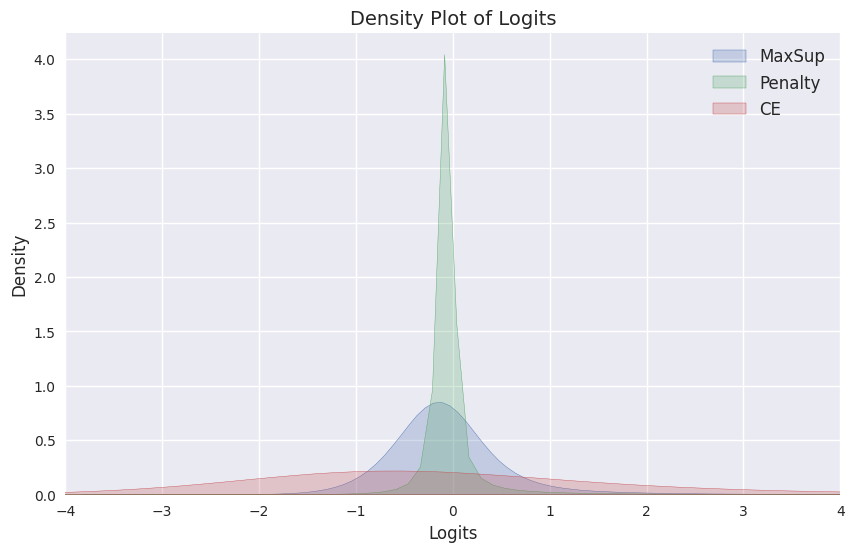

In [27]:
logits_list = [maxsup_logits[:10000, :].flatten().cpu().numpy(), penalty_logits[:10000, :].flatten().cpu().numpy(), ce_logits[:10000, :].flatten().cpu().numpy()]
plot_density_seaborn(logits_list)

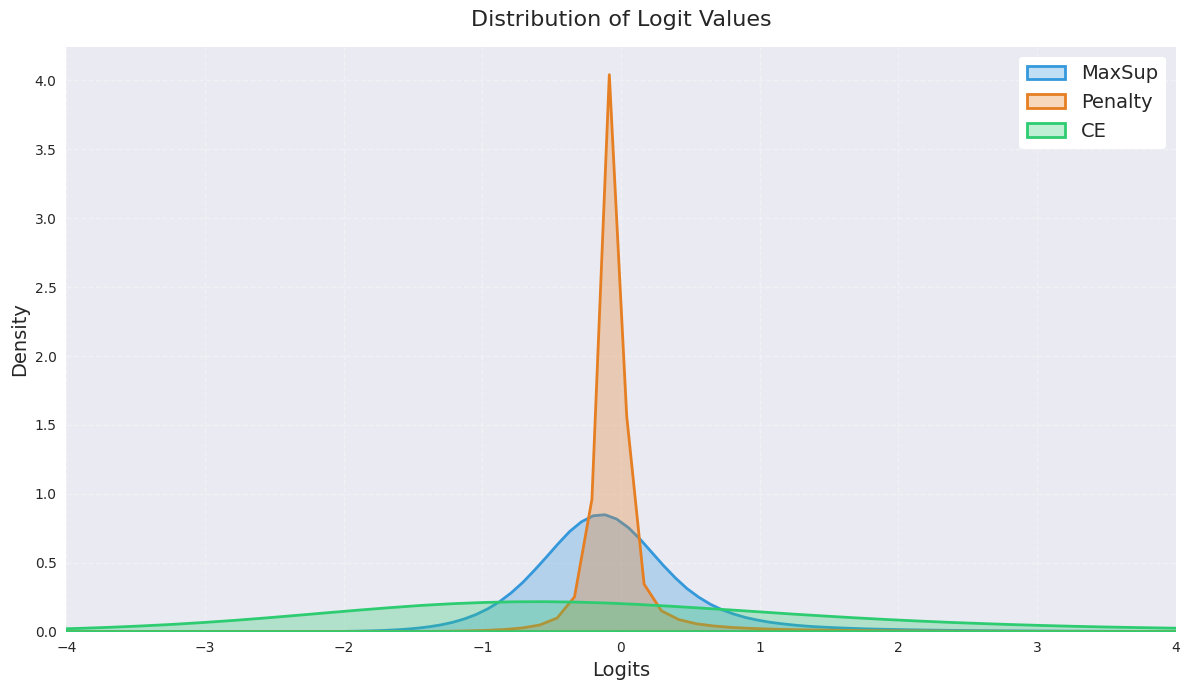

In [30]:

# plot all logits
logits_list = [maxsup_logits[:10000, :].flatten().cpu().numpy(), penalty_logits[:10000, :].flatten().cpu().numpy(), ce_logits[:10000, :].flatten().cpu().numpy()]
plot_density_seaborn_better(logits_list)


In [20]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [40]:
logits_list = [maxsup_logits[:10000, :].flatten().cpu().numpy(), penalty_logits[:10000, :].flatten().cpu().numpy(), ce_logits[:10000, :].flatten().cpu().numpy(), ls_logits[:10000, :].flatten().cpu().numpy()]

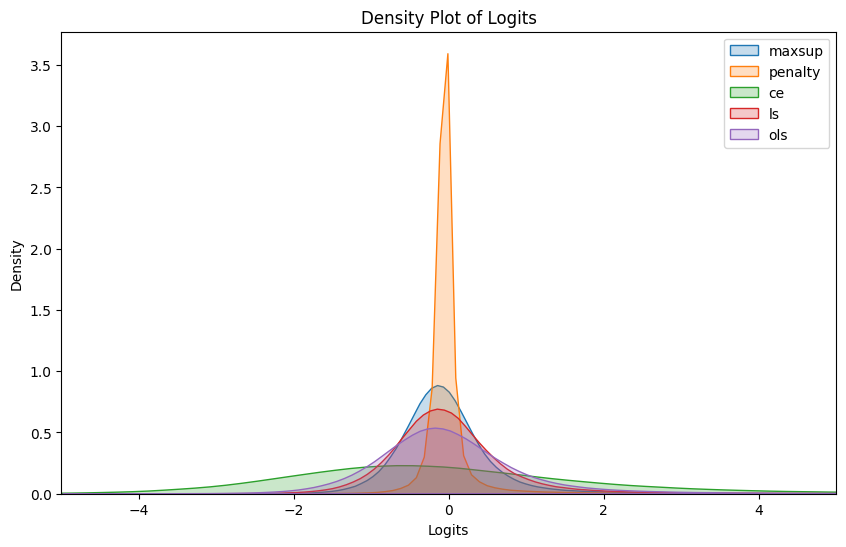

In [8]:
new_logits_list = [maxsup_logits[:1000, :].flatten().cpu().numpy(), penalty_logits[:1000, :].flatten().cpu().numpy(), ce_logits[:1000, :].flatten().cpu().numpy(), ls_logits[:1000, :].flatten().cpu().numpy(), ols_logits[:1000, :].flatten().cpu().numpy()]
plot_density_seaborn(new_logits_list)